# Title
### Applied Data Science Capstone by IBM/Coursera

## Table of contents <a name="top"></a>
1. [Introduction: Business Problem](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis](#analysis)
5. [Results and Discussion](#results)
6. [Conclusion](#conclusion)

[ImHere](#here) delete this tag

## 1. Introduction: Business Problem <a name="introduction"></a>



Before continuing I would like to make a *caveat*, this work will be conducted in English, but the main data was collected on german websites, so some translations might not be up to par, we are sorry for that.

In [ ]:
from IPython.display import HTML

In [ ]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

[To Table of Contents](#top)

## **2. Data**<a name="data"></a>

One of the most important steps in our project was choosing the area on which we would do our study, finally we decided to study all the cities within a ~20 kilometer radius from Bad Homburg vor der Höhe and all of Frankfurt am Main. 

This posed a problem, since our study is based on latitude and longitude coordinates, the larger area cities would be underrepresented.


In order to try to solve the aforementioned problem we decided on using postal codes for the larger cities such as Bad Homburg vor der Höhe, Frankfurt am Main and Offenbach am Main, this was further supported by seing that the smaller cities would usually only have one postal code.

Using the https://www.suche-postleitzahl.org/ website we searched all cities within the defined radius, got the postal codes and we built a excel file to support our analysis.

- falar dos dados de localização e do foursquare

**First let's read and explore the excel file with our initial location data.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

%matplotlib inline

mpl.style.use('ggplot') # optional: for ggplot-like style


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_excel("cities_ag.xlsx", sheet_name="Folha1")
#df = pd.read_csv("cities_ag1.csv", sep=';', encoding="utf-8")

df

PLZ                                          Ortsteile  \
0   65520                                        Bad Camberg   
1   61348                           Bad Homburg vor der Höhe   
2   61352                           Bad Homburg vor der Höhe   
3   61350                           Bad Homburg vor der Höhe   
4   61231                                        Bad Nauheim   
5   65812                                Bad Soden am Taunus   
6   61118                                         Bad Vilbel   
7   35510                                           Butzbach   
8   65817                                           Eppstein   
9   65760                                           Eschborn   
10  61197                                          Florstadt   
11  60308                                        Westend-Süd   
12  60549                                          Flughafen   
13  60329  Bahnhofsviertel, Gallus, Gutleutviertel, Innen...   
14  60313                               Altstadt, Innenstadt   
15  60438                                   Kalbach-Riedberg   
16  60311                               Altstadt, Innenstadt   
17  60325                    Bockenheim, Gallus, Westend-Süd   
18  60323                          Westend-Nord, Westend-Süd   
19  60327                Gallus, Gutleutviertel, Westend-Süd   
20  60314                                 Fechenheim, Ostend   
21  60596                                 Sachsenhausen-Nord   
22  60322  Dornbusch, Innenstadt, Nordend-West, Westend-N...   
23  65936                                   Nied, Sossenheim   
24  60487         Bockenheim, Hausen, Rödelheim, Westend-Süd   
25  60320  Dornbusch, Eckenheim, Nordend-West, Westend-No...   
26  60594                                 Sachsenhausen-Nord   
27  60489                                          Rödelheim   
28  65934                                       Höchst, Nied   
29  60318              Innenstadt, Nordend-Ost, Nordend-West   
30  60598              Sachsenhausen-Nord, Sachsenhausen-Süd   
31  60388                           Bergen-Enkheim, Seckbach   
32  60486         Bockenheim, Gallus, Rödelheim, Westend-Süd   
33  60488                       Hausen, Praunheim, Rödelheim   
34  60529                                         Schwanheim   
35  65931                              Sindlingen, Zeilsheim   
36  60326                                  Gallus, Griesheim   
37  60386         Bornheim, Fechenheim, Riederwald, Seckbach   
38  60316                 Nordend-West, Nordend-Ost, Ostend    
39  60599     Oberrad, Sachsenhausen-Nord, Sachsenhausen-Süd   
40  65933                                          Griesheim   
41  60431  Bockenheim, Dornbusch, Eschersheim, Ginnheim, ...   
42  60528  Niederrad, Sachsenhausen-Nord, Sachsenhausen-S...   
43  60389  Bergen-Enkheim, Bornheim, Nordend-Ost, Nordend...   
44  60433  Bonames, Dornbusch, Eschersheim, Frankfurter B...   
45  65929                            Höchst, Unterliederbach   
46  60435  Berkersheim, Bornheim, Dornbusch, Eckenheim, N...   
47  60437  Bonames, Harheim, Kalbach-Riedberg, Nieder-Erl...   
48  60385                      Bornheim, Nordend-Ost, Ostend   
49  60439  Heddernheim, Kalbach-Riedberg, Niederursel, Pr...   
50  60312                                         Innenstadt   
51  60306                                        Westend-Süd   
52  60310                                         Innenstadt   
53  61169                                 Friedberg (Hessen)   
54  61381                                     Friedrichsdorf   
55  61479                                Glashütten (Taunus)   
56  61279                                     Grävenwiesbach   
57  63454                   Hanau, Kesselstadt, Mittelbuchen   
58  65795                                        Hattersheim   
59  65719                                  Hofheim am Taunus   
60  65510                                Idstein, Hünstetten   
61  61184                             

For clarity a brief explanation of the columns names is in order: 

PLZ - Postal code 

Ortsteile - city district ( in the larger cities in accordance to the source, some postal codes represent several districts)

Ort - municipality

Landkreis - administrativ district

einwohner - Residents (Based on 2011 census)


These columns are not without problems, particularly the second and third rows wich are important for our work. In both columns there are duplicates and in the second column Ortsteile there are very big names that we couldn't clearly classify so we used all the available information, these names are not user friendly for visualization.

### **Data cleaning and transformation**

**Now let's check to see if our data needs some cleaning and transformation, beggining by describing all variables and the correspondent types**

In [2]:
df.describe(include='all')

PLZ                 Ortsteile                Ort  \
count      96.000000                        96                 96   
unique           NaN                        90                 51   
top              NaN  Bad Homburg vor der Höhe  Frankfurt am Main   
freq             NaN                         3                 39   
mean    61807.239583                       NaN                NaN   
std      3409.574441                       NaN                NaN   
min     35510.000000                       NaN                NaN   
25%     60436.500000                       NaN                NaN   
50%     61204.500000                       NaN                NaN   
75%     63097.500000                       NaN                NaN   
max     65936.000000                       NaN                NaN   

               Landkreis     einwohner  
count                 96     96.000000  
unique                 9           NaN  
top     kreisfreie Stadt           NaN  
freq                  48           NaN  
mean                 NaN  16720.812500  
std                  NaN   9472.599752  
min                  NaN      0.000000  
25%                  NaN   9295.000000  
50%                  NaN  15895.500000  
75%                  NaN  21649.250000  
max                  NaN  44125.000000

In [3]:
print(df.shape)
df.dtypes

(96, 5)


PLZ           int64
Ortsteile    object
Ort          object
Landkreis    object
einwohner     int64
dtype: object

We have 96 rows and 5 columns and no null values. Since the PLZ column isn't supposed to be numeric we will change the column's type to string.

In [4]:
#change PLZ to string
df['PLZ'] = df['PLZ'].astype(str)

df.dtypes

PLZ          object
Ortsteile    object
Ort          object
Landkreis    object
einwohner     int64
dtype: object

**Checking and visualizing any missing data from our dataset**

<AxesSubplot:>

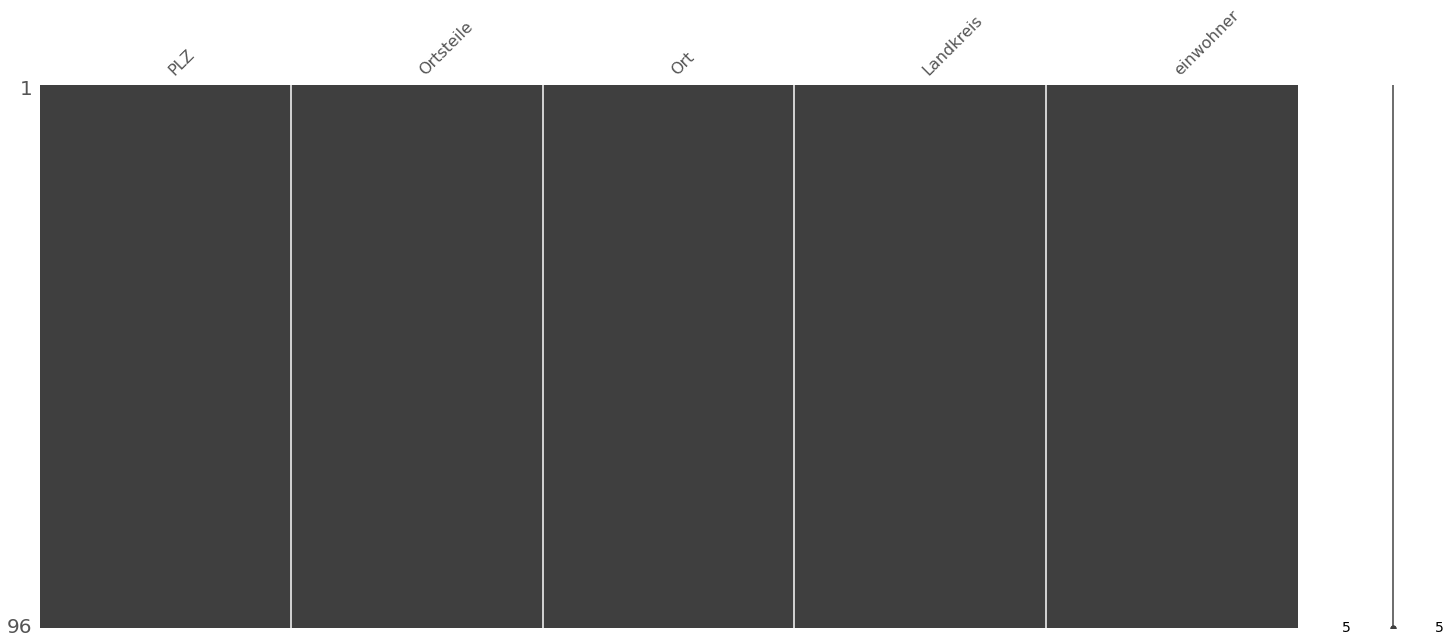

In [5]:
import missingno as msno

msno.matrix(df)

These solid bars mean that missing data isn't a problem.

**Let's explore in detail the residents (einwohner) column**

In [6]:
#describe numeric variable
df[['einwohner']].describe().round(decimals=2)

einwohner
count      96.00
mean    16720.81
std      9472.60
min         0.00
25%      9295.00
50%     15895.50
75%     21649.25
max     44125.00

As we can see in our 96 areas the average residents number is 16720 with a standard deviation of 9472,60. The minimum value is 0 and the maximum is 44125.

**Drawing the variable histogram**

array([[<AxesSubplot:title={'center':'einwohner'}>]], dtype=object)

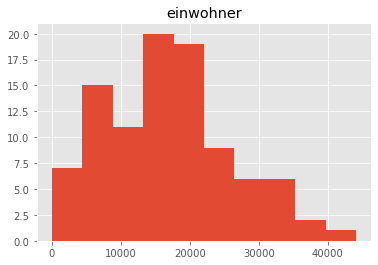

In [7]:
ein_hist = df[['einwohner']]
ein_hist.hist()

**Ordering the number of residents by area in descending order**

In [8]:
grouped_df = df.groupby(by=["PLZ","Ortsteile", 'Ort'], dropna=False).sum()
grouped_df.sort_values(['einwohner'],ascending=False)

einwohner
PLZ   Ortsteile                                          Ort                                      
61440 Oberursel (Taunus)                                 Oberursel                           44125
65719 Hofheim am Taunus                                  Hofheim am Taunus                   37735
63477 Maintal                                            Maintal                             35827
60439 Heddernheim, Kalbach-Riedberg, Niederursel, Pra... Frankfurt am Main                   35056
63263 Neu-Isenburg                                       Neu-Isenburg                        34716
65510 Idstein, Hünstetten                                Idstein, Hünstetten                 33269
60385 Bornheim, Nordend-Ost, Ostend                      Frankfurt am Main                   33049
61118 Bad Vilbel                                         Bad Vilbel                          31268
60437 Bonames, Harheim, Kalbach-Riedberg, Nieder-Erle... Frankfurt am Main                   31230
61231 Bad Nauheim                                        Bad Nauheim                         30209
60435 Berkersheim, Bornheim, Dornbusch, Eckenheim, No... Frankfurt am Main                   29833
65929 Höchst, Unterliederbach                            Frankfurt am Main                   28067
65779 Kelkheim                                           Kelkheim                            27670
61169 Friedberg (Hessen)                                 Friedberg (Hessen)                  27355
63165 Mühlheim am Main                                   Mühlheim am Main                    26967
63069 Lauterborn, Offenbach am Main, Rosenhöhe           Offenbach am Main                   26222
65795 Hattersheim                                        Hattersheim                         24747
61381 Friedrichsdorf                                     Friedrichsdorf                      24223
35510 Butzbach                                           Butzbach                            23912
60433 Bonames, Dornbusch, Eschersheim, Frankfurter Be... Frankfurt am Main                   23869
60389 Bergen-Enkheim, Bornheim, Nordend-Ost, Nordend-... Frankfurt am Main                   23031
60528 Niederrad, Sachsenhausen-Nord, Sachsenhausen-Sü... Frankfurt am Main                   22825
60431 Bockenheim, Dornbusch, Eschersheim, Ginnheim, P... Frankfurt am Main                   22625
65933 Griesheim                                          Frankfurt am Main                   22187
61350 Bad Homburg vor der Höhe                           Bad Homburg vor der Höhe            21470
60599 Oberrad, Sachsenhausen-Nord, Sachsenhausen-Süd     Frankfurt am Main                   21441
65812 Bad Soden am Taunus                                Bad Soden am Taunus                 21203
63071 Offenbach am Main, Tempelsee                       Offenbach am Main                   21159
61184 Karben                                             Karben                              21144
60316 Nordend-West, Nordend-Ost, Ostend                  Frankfurt am Main                   21128
60386 Bornheim, Fechenheim, Riederwald, Seckbach         Frankfurt am Main                   21018
60326 Gallus, Griesheim                                  Frankfurt am Main                   20809
65931 Sindlingen, Zeilsheim                              Frankfurt am Main                   20603
65760 Eschborn                                           Eschborn                            20317
60529 Schwanheim                                         Frankfurt am Main                   20099
61130 Nidderau                                           Nidderau                            19874
60488 Hausen, Praunheim, Rödelheim                       Frankfurt am Main                   19506
60486 Bockenheim, Gallus, Rödelheim, Westend-Süd         Frankfurt am Main                   19141
60388 Bergen-Enkheim, Seckbach                           Frankfurt am Main                   18712
63067 Offenbach am Main, Kaise

Accordingly to our data the area with most residents is Oberusel and the least populated area with only 12 residents is the Flughafen area in Frankfurt am Main ( not considering areas with 0 residents).

**According to the table above Oberusel is the area with the most residents, now let's see the agreggate data by municipality (ort)**

In [9]:
sum_res = df.groupby(['Ort'])['einwohner'].sum().to_frame()
sum_res.sort_values(['einwohner'],ascending=False)

einwohner
Ort                                      
Frankfurt am Main                  668287
Offenbach am Main                  113241
Bad Homburg vor der Höhe            51397
Oberursel                           44125
Hofheim am Taunus                   37735
Maintal                             35827
Neu-Isenburg                        34716
Idstein, Hünstetten                 33269
Bad Vilbel                          31268
Bad Nauheim                         30209
Kelkheim                            27670
Friedberg (Hessen)                  27355
Mühlheim am Main                    26967
Hattersheim                         24747
Friedrichsdorf                      24223
Butzbach                            23912
Bad Soden am Taunus                 21203
Karben                              21144
Eschborn                            20317
Nidderau                            19874
Kronberg                            17793
Königstein                          15711
Hanau                               14749
Schwalbach am Taunus                14729
Neu-Anspach                         14710
Niedernhausen                       14408
Bad Camberg                         13931
Usingen                             13329
Eppstein                            13327
Kelsterbach                         13315
Rosbach v. d. Höhe                  11931
Schöneck                            11633
Kriftel                             10580
Steinbach                           10058
Niddatal                             9302
Wehrheim                             9274
Schmitten                            8849
Florstadt                            8786
Liederbach am Taunus                 8688
Sulzbach (Taunus)                    8304
Reichelsheim                         6778
Weilrod                              6277
Wöllstadt                            6123
Ober-Mörlen                          5762
Glashütten                           5234
Waldems                              5210
Grävenwiesbach                       5194
Niederdorfelden                      3727
Frankfurt am Main (Omniturm)            0
Frankfurt am Main (Opernturm)           0
Frankfurt am Main (Taunusturm)          0

As expected Frankfurt am Main is at top of this table.

In [10]:
print("Total number of residents:", df['einwohner'].sum())

Total number of residents: 1605198


**Everything's better with a graph: Residents (eihnwohner)**

In [11]:
graph_df = df[['PLZ','Ort','einwohner']].copy()

In [12]:
#create a new column
graph_df['PLZ_Ort'] = graph_df[['PLZ', 'Ort']].agg(' '.join, axis=1)
graph_df.drop(['PLZ','Ort'], axis=1, inplace=True)

#let's move the new column
fixed_columns = [graph_df.columns[-1]] + list(graph_df.columns[:-1])
graph_df = graph_df[fixed_columns]

#set index new column
graph_df.set_index('PLZ_Ort', inplace=True)

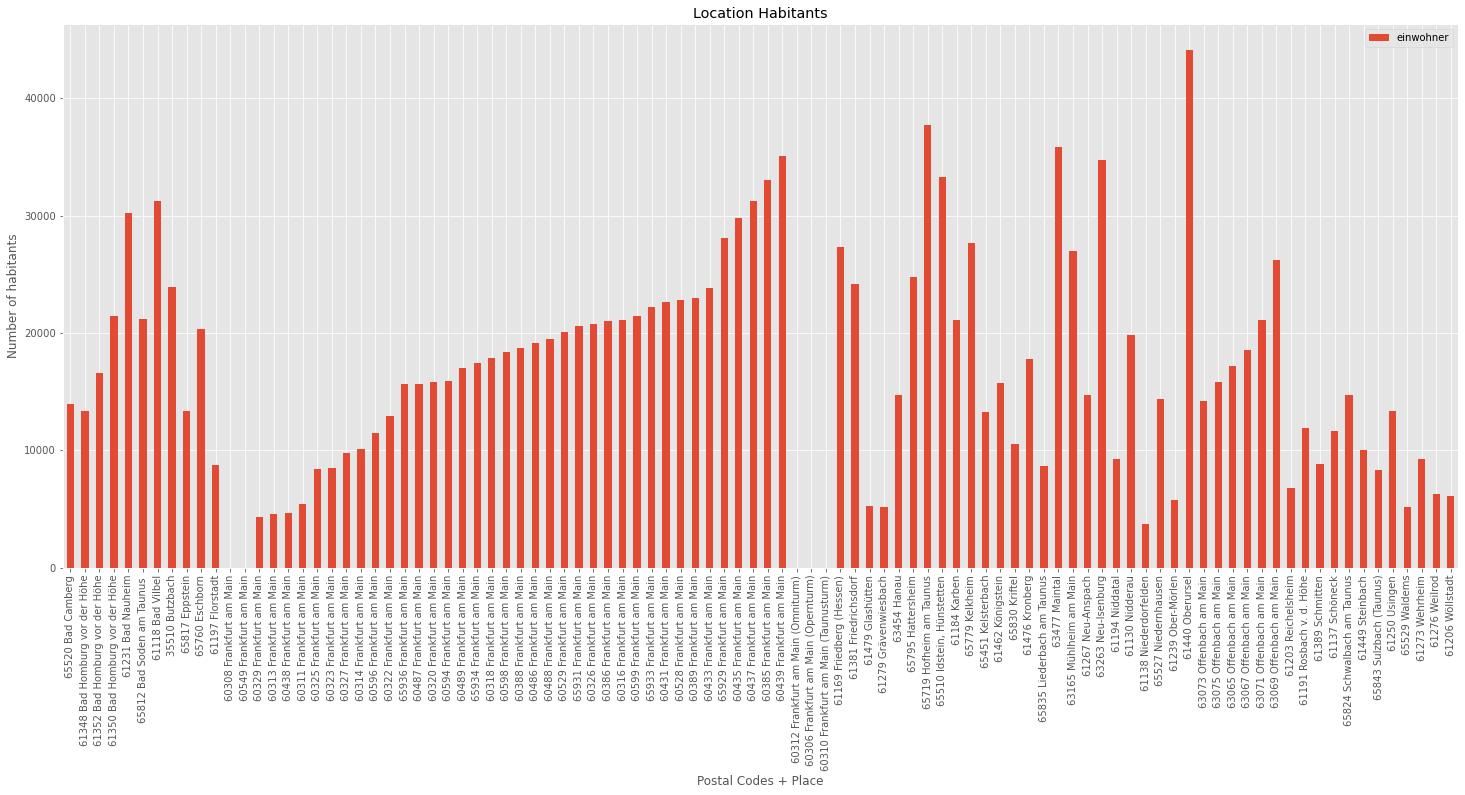

In [13]:
graph_df.plot(kind='bar',
             figsize=(25, 10))

plt.title('Location Habitants')
plt.ylabel('Number of habitants')
plt.xlabel('Postal Codes + Place')

plt.show()

From the analysis we reach the conclusion that there are areas where we don't have inhabitants, so we decided that we will drop the correspondent rows. 

We will drop all places which have less than 100 inhabitants, this number is arbitrarily defined to exclude low density areas wich will probably have fewer amenities to study and where it should be impossible to purchase a home.

In [14]:
#let's drop all rows with less than 100 persons
print("Old dataset: ",df.shape)
df.drop(df.loc[df['einwohner']<100].index, inplace=True)
print("New dataset: ",df.shape)

Old dataset:  (96, 5)
New dataset:  (91, 5)


**Finnaly let's enumerate the areas our study**

In [15]:
df.groupby(['Ort'])['PLZ'].count().to_frame()

PLZ
Ort                          
Bad Camberg                 1
Bad Homburg vor der Höhe    3
Bad Nauheim                 1
Bad Soden am Taunus         1
Bad Vilbel                  1
Butzbach                    1
Eppstein                    1
Eschborn                    1
Florstadt                   1
Frankfurt am Main          37
Friedberg (Hessen)          1
Friedrichsdorf              1
Glashütten                  1
Grävenwiesbach              1
Hanau                       1
Hattersheim                 1
Hofheim am Taunus           1
Idstein, Hünstetten         1
Karben                      1
Kelkheim                    1
Kelsterbach                 1
Kriftel                     1
Kronberg                    1
Königstein                  1
Liederbach am Taunus        1
Maintal                     1
Mühlheim am Main            1
Neu-Anspach                 1
Neu-Isenburg                1
Niddatal                    1
Nidderau                    1
Niederdorfelden             1
Niedernhausen               1
Ober-Mörlen                 1
Oberursel                   1
Offenbach am Main           6
Reichelsheim                1
Rosbach v. d. Höhe          1
Schmitten                   1
Schwalbach am Taunus        1
Schöneck                    1
Steinbach                   1
Sulzbach (Taunus)           1
Usingen                     1
Waldems                     1
Wehrheim                    1
Weilrod                     1
Wöllstadt                   1

From the table above our study will focus in:

1. 45 City centers 
2. 37 Frankfurt am Main postal codes areas
3. 06 Offenbach am Main postal codes areas
4. 03 Bad Homburg vor der Höhe postal codes areas 


**Total of 91 areas to search for amenities**

In [16]:
#create a copy
am_df = df.copy()

**Getting the coordinates latitude and longitude for the studied areas**

After some cleaning it's time to get the coordinates.

For this purpose we are going to use the Nominatim api and acess the Openstreetmap database.

We will find latitude and longitude for each city center and postal code area (Frankfurt am Main, Bad Homburg vor der Höhe and Offenbach am Main).

In [17]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geocoder = Nominatim(user_agent="hg_explorer")
geocode = RateLimiter(geocoder.geocode, min_delay_seconds = 1,   return_value_on_exception = None)

def custom_geocoder(postal,local):
    if(local in ['Frankfurt am Main', 'Bad Homburg vor der Höhe', 'Offenbach am Main']):
        address1 = str(postal) + " Deutschland"
        location = geocode(address1)    
    else:
        address1 = str(local) + ", Hessen"
        location = geocode(address1)
    return pd.Series({'Latitude': location.latitude, 'Longitude': location.longitude})

# Try to load from local file system in case we did this before
loaded = False
try:
    am_df = pd.read_pickle('./locations.pkl')
    loaded = True
    print("Just loaded stored pickle!")
except:
    pass

if not loaded:
    am_df[['latitude' , 'longitude']] = am_df[['PLZ','Ort']].apply(lambda x: custom_geocoder(x['PLZ'], x['Ort']), axis=1)
    print("Just had to get the coordinates data and i'll store it for later usage")
    am_df.to_pickle('./locations.pkl')

Just loaded stored pickle!


Let's see what we got and pickle it for later use

In [103]:
am_df

PLZ                                          Ortsteile  \
0   65520                                        Bad Camberg   
1   61348                           Bad Homburg vor der Höhe   
2   61352                           Bad Homburg vor der Höhe   
3   61350                           Bad Homburg vor der Höhe   
4   61231                                        Bad Nauheim   
5   65812                                Bad Soden am Taunus   
6   61118                                         Bad Vilbel   
7   35510                                           Butzbach   
8   65817                                           Eppstein   
9   65760                                           Eschborn   
10  61197                                          Florstadt   
13  60329  Bahnhofsviertel, Gallus, Gutleutviertel, Innen...   
14  60313                               Altstadt, Innenstadt   
15  60438                                   Kalbach-Riedberg   
16  60311                               Altstadt, Innenstadt   
17  60325                    Bockenheim, Gallus, Westend-Süd   
18  60323                          Westend-Nord, Westend-Süd   
19  60327                Gallus, Gutleutviertel, Westend-Süd   
20  60314                                 Fechenheim, Ostend   
21  60596                                 Sachsenhausen-Nord   
22  60322  Dornbusch, Innenstadt, Nordend-West, Westend-N...   
23  65936                                   Nied, Sossenheim   
24  60487         Bockenheim, Hausen, Rödelheim, Westend-Süd   
25  60320  Dornbusch, Eckenheim, Nordend-West, Westend-No...   
26  60594                                 Sachsenhausen-Nord   
27  60489                                          Rödelheim   
28  65934                                       Höchst, Nied   
29  60318              Innenstadt, Nordend-Ost, Nordend-West   
30  60598              Sachsenhausen-Nord, Sachsenhausen-Süd   
31  60388                           Bergen-Enkheim, Seckbach   
32  60486         Bockenheim, Gallus, Rödelheim, Westend-Süd   
33  60488                       Hausen, Praunheim, Rödelheim   
34  60529                                         Schwanheim   
35  65931                              Sindlingen, Zeilsheim   
36  60326                                  Gallus, Griesheim   
37  60386         Bornheim, Fechenheim, Riederwald, Seckbach   
38  60316                 Nordend-West, Nordend-Ost, Ostend    
39  60599     Oberrad, Sachsenhausen-Nord, Sachsenhausen-Süd   
40  65933                                          Griesheim   
41  60431  Bockenheim, Dornbusch, Eschersheim, Ginnheim, ...   
42  60528  Niederrad, Sachsenhausen-Nord, Sachsenhausen-S...   
43  60389  Bergen-Enkheim, Bornheim, Nordend-Ost, Nordend...   
44  60433  Bonames, Dornbusch, Eschersheim, Frankfurter B...   
45  65929                            Höchst, Unterliederbach   
46  60435  Berkersheim, Bornheim, Dornbusch, Eckenheim, N...   
47  60437  Bonames, Harheim, Kalbach-Riedberg, Nieder-Erl...   
48  60385                      Bornheim, Nordend-Ost, Ostend   
49  60439  Heddernheim, Kalbach-Riedberg, Niederursel, Pr...   
53  61169                                 Friedberg (Hessen)   
54  61381                                     Friedrichsdorf   
55  61479                                Glashütten (Taunus)   
56  61279                                     Grävenwiesbach   
57  63454                   Hanau, Kesselstadt, Mittelbuchen   
58  65795                                        Hattersheim   
59  65719                                  Hofheim am Taunus   
60  65510                                Idstein, Hünstetten   
61  61184                                             Karben   
62  65779                                           Kelkheim   
63  65451                                        Kelsterbach   
64  61462                               Königstein im Taunus   
65  65830                                            Kriftel   
66  61476                             

Next we are going to explore the distance between the diferent points we collected by creating a distance matrix, a cool way to quickly check the distances between areas.

For this distance matrix we will be using the haversine (or great circle) distance wich is the angular distance between two points on the surface of a sphere.

In [19]:
#distance matrix
from sklearn.neighbors import DistanceMetric
from math import radians

matrix = am_df[['PLZ', 'Ort','latitude','longitude']].copy()

In [20]:
#I don't like repeating code but for now it'll do
#create a new column
matrix['PLZ_Ort'] = matrix[['PLZ', 'Ort']].agg(' '.join, axis=1)
matrix.drop(['PLZ','Ort'], axis=1, inplace=True)

#let's move the new column
fixed_columns = [matrix.columns[-1]] + list(matrix.columns[:-1])
matrix = matrix[fixed_columns]

In [21]:
matrix['latitude'] = np.radians(matrix['latitude'])
matrix['longitude'] = np.radians(matrix['longitude'])

In [22]:
dist = DistanceMetric.get_metric('haversine')

In [23]:
pd.DataFrame(dist.pairwise(matrix[['latitude','longitude']].to_numpy())*6371,  columns=matrix.PLZ_Ort.unique(), index=matrix.PLZ_Ort.unique()).round(decimals=2)

65520 Bad Camberg  \
65520 Bad Camberg                            0.00   
61348 Bad Homburg vor der Höhe              25.77   
61352 Bad Homburg vor der Höhe              28.78   
61350 Bad Homburg vor der Höhe              24.58   
61231 Bad Nauheim                           34.91   
65812 Bad Soden am Taunus                   24.18   
61118 Bad Vilbel                            36.20   
35510 Butzbach                              32.31   
65817 Eppstein                              19.88   
65760 Eschborn                              27.81   
61197 Florstadt                             42.52   
60329 Frankfurt am Main                     35.54   
60313 Frankfurt am Main                     35.96   
60438 Frankfurt am Main                     29.23   
60311 Frankfurt am Main                     36.26   
60325 Frankfurt am Main                     34.63   
60323 Frankfurt am Main                     34.54   
60327 Frankfurt am Main                     34.99   
60314 Frankfurt am Main                     37.84   
60596 Frankfurt am Main                     36.62   
60322 Frankfurt am Main                     34.97   
65936 Frankfurt am Main                     29.13   
60487 Frankfurt am Main                     32.93   
60320 Frankfurt am Main                     33.90   
60594 Frankfurt am Main                     37.05   
60489 Frankfurt am Main                     31.09   
65934 Frankfurt am Main                     30.98   
60318 Frankfurt am Main                     35.58   
60598 Frankfurt am Main                     37.58   
60388 Frankfurt am Main                     38.36   
60486 Frankfurt am Main                     33.26   
60488 Frankfurt am Main                     30.38   
60529 Frankfurt am Main                     33.28   
65931 Frankfurt am Main                     28.69   
60326 Frankfurt am Main                     33.86   
60386 Frankfurt am Main                     39.67   
60316 Frankfurt am Main                     36.45   
60599 Frankfurt am Main                     38.86   
65933 Frankfurt am Main                     32.63   
60431 Frankfurt am Main                     32.45   
60528 Frankfurt am Main                     36.00   
60389 Frankfurt am Main                     36.35   
60433 Frankfurt am Main                     32.47   
65929 Frankfurt am Main                     28.90   
60435 Frankfurt am Main                     34.22   
60437 Frankfurt am Main                     31.37   
60385 Frankfurt am Main                     37.03   
60439 Frankfurt am Main                     30.32   
61169 Friedberg (Hessen)                    34.78   
61381 Friedrichsdorf                        27.71   
61479 Glashütten                            13.41   
61279 Grävenwiesbach                        16.61   
63454 Hanau                                 49.77   
65795 Hattersheim                           29.68   
65719 Hofheim am Taunus                     26.93   
65510 Idstein, Hünstetten                    3.49   
61184 Karben                                36.65   
65779 Kelkheim                              22.30   
65451 Kelsterbach                           32.07   
61462 Königstein                            19.22   
65830 Kriftel                               27.91   
61476 Kronberg                              21.73   
65835 Liederbach am Taunus                  25.13   
63477 Maintal                               44.08   
63165 Mühlheim am Main                      46.41   
61267 Neu-Anspach                           17.23   
63263 Neu-Isenburg                          40.85   
61194 Niddatal                              40.25   
61130 Nidderau                              43.99   
61138 Niederdorfelden                       39.86   
65527 Niedernhausen                         15.77   
61239 Ober-Mörlen                           31.25   
61440 Oberursel                             24.84   
63073 Offenbach am Main                     45.12   
63075 Offenbach am Main                     42.40   
6306

This distance matrix, calculated with the haversine formula, show us the shortest distance in kilometers between two points on a sphere (Earth) using their latitudes and longitudes measured along the surface. It is important for use in navigation.

As stated before we decided to study areas within a radius of ~20 kilometers of Bad Homburg vor der Höhe (postal code: 61348), but the distance matrix tells us that there are distantes greater than 20km, this merits an explanation.

When we were considering the coordinates to study we first used only postal codes, but we noticed that for some areas particularly the ones where we got one city/one postal code, the postal code coordinates would be far from the city center, and so we would get fewer amenities results. So in order to have a better sense of amenities available we decided that for areas corresponding to one city/one postal code we would get the city center coordinates and this explains why the "61348 Bad Homburg vor der Höhe" distances column are not all under 20 kilometers. The difference in distance may be further explained by the usage of the haversine formula itself since usually the distance is calculated in a straight line, we couldn't confirm if this is true.

**Now lets see our areas of study in a map**

In [24]:
#helper function to get center coordinates from a set of coordinates
def get_center_latlong(df, latColName,lonColName):
    # get the center of my map for plotting
    centerlat = (df[latColName].max() + df[latColName].min()) / 2
    centerlong = (df[lonColName].max() + df[lonColName].min()) / 2
    return centerlat, centerlong

In [25]:
center = get_center_latlong(am_df,'latitude','longitude')

In [26]:
map_target = folium.Map(location=center, zoom_start=10, tiles="Stamen Toner")

# add markers to map
for lat, lng, ort, orts, plz in zip(am_df['latitude'], am_df['longitude'], am_df['Ort'], am_df['Ortsteile'], am_df['PLZ']):
    if(ort in ['Frankfurt am Main', 'Offenbach am Main']):
        label = '{}, {}, {}'.format(ort, orts, plz)
        label = folium.Popup(label, parse_html=True)
        folium.Circle([lat, lng],
                      radius=500,
                      popup=label,
                      color='red',
                      fill=True,
                      fill_color='#f73447',
                      fill_opacity=0.7,
                      parse_html=False).add_to(map_target)
    else:
        label = '{}, {}, {}'.format(ort, orts, plz)
        label = folium.Popup(label, parse_html=True)
        folium.Circle([lat, lng],
                      radius=1000,
                      popup=label,
                      color='blue',
                      fill=True,
                      fill_color='#3186cc',
                      fill_opacity=0.7,
                      parse_html=False).add_to(map_target)

map_target

In the above map we can see all areas involved in this study. Here you can see blue and red circles, these circles represent the individual areas where we will search for amenities. A blue circle area is 1000 meters and the red circle area is 500 meters. 

Why did we choose to make this distinction? Because comparing a small city to a big city it's not feasible, the difference in amenities density in those two would be too big. 

So we decided that for this study, for clarity and to try to diminish overlapping/difference between areas, particularly in Frankfurt am Main and in Offenbach am Main, we would have to different radius, hence 500 and 1000 meters.

We will tolerate some overlapping because we want fo find the places with the most amenities available and if it is within the radius of the area we will keep it.

**Amenities data: Using the Foursquare API let's collect data!**

In [27]:
#open file and read credentials
f=open("foursquare_cred.txt","r")
lines=f.readlines()
clientId=lines[1].rstrip("\n")
clientSecret=lines[3].rstrip("\n")
f.close()

In [28]:
CLIENT_ID = clientId # your Foursquare ID
CLIENT_SECRET = clientSecret # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentials were uploaded!')

Your credentials were uploaded!


In [29]:
import requests

def getNearbyAmenities(postal,names, latitudes, longitudes):    
    venues_list=[]
    for postal, name, lat, lng in zip(postal, names, latitudes, longitudes):
        if(name in ['Frankfurt am Main', 'Offenbach am Main']):
            radius = 500
            

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
            #print("{} and {}".format(name, radius))

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                postal,
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['PLZ','Ort', 
                          'Ort_Lat', 
                          'Ort_Lon', 
                          'Amenity', 
                          'Am_Lat', 
                          'Am_Lon', 
                          'Am_Category']
        else:
            #print("fora",name)
            radius = 1000
            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
            
            #print("{} and {}".format(name, radius))

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                postal,
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

            nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            nearby_venues.columns = ['PLZ','Ort', 
                          'Ort_Lat', 
                          'Ort_Lon', 
                          'Amenity', 
                          'Am_Lat', 
                          'Am_Lon', 
                          'Am_Category']    
    print("all done")
    return(nearby_venues)


# Try to load from local file system in case we did this before
loaded = False
try:
    amenities = pd.read_pickle('./ameneties.pkl')
    loaded = True
    print("Just loaded stored pickle!")
except:
    pass

# If load failed use the Foursquare API to get the data
if not loaded:
    amenities = getNearbyAmenities(postal=am_df['PLZ'],
                                   names=am_df['Ort'],
                                   latitudes=am_df['latitude'],
                                   longitudes=am_df['longitude'])
    amenities.to_pickle('./ameneties.pkl')

Just loaded stored pickle!


In [30]:
print(amenities.shape)
amenities.head()

(1673, 8)


PLZ          Ort    Ort_Lat   Ort_Lon              Amenity     Am_Lat  \
0  65520  Bad Camberg  50.299603  8.267312                 REWE  50.301920   
1  65520  Bad Camberg  50.299603  8.267312           India Haus  50.298974   
2  65520  Bad Camberg  50.299603  8.267312  Kurpark Bad Camberg  50.297865   
3  65520  Bad Camberg  50.299603  8.267312        Banyan Garden  50.295113   
4  65520  Bad Camberg  50.299603  8.267312         Cafe Schäfer  50.302721   

     Am_Lon         Am_Category  
0  8.260702         Supermarket  
1  8.264521   Indian Restaurant  
2  8.272318                Park  
3  8.269464  Chinese Restaurant  
4  8.260552              Bakery

Now let's see our amenities in a map!

In [31]:
#get center coordinates for all amenities
am_center = get_center_latlong(amenities, 'Am_Lat','Am_Lon')

#map
map_amenities = folium.Map(location=am_center, zoom_start=10)

# add markers to map
for lat, lng, ort, orts, plz in zip(amenities['Am_Lat'], amenities['Am_Lon'], amenities['Amenity'],
                                    amenities['Am_Category'], amenities['PLZ']):
    label = '{}, {}, {}'.format(ort, orts, plz)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat, lng],
                  radius=3,
                  popup=label,
                  color='blue',
                  fill=True,
                  fill_color='blue',
                  fill_opacity=1,
                  parse_html=False).add_to(map_amenities)    

map_amenities

## 3. Methodology <a name="methodology"></a>

[To Table of Contents](#top)

## 4. Analysis <a name="analysis"></a>

Let's analyse our data and try to get some insights from it. Remembering what we wrote earlier there is some overlap between the areas so it's possible that there are duplicates in our dataset.

So for this analysis the first thing we'll do is removing the duplicate amenities in the dataset.

In [32]:
#let's copy the data
df_am = amenities.copy()

In [33]:
print("Old Dataset: ", df_am.shape)
firstNum = df_am.shape[0]
df_am.drop_duplicates(['Am_Lat','Am_Lon'], inplace=True)
print("New Dataset: ", df_am.shape)
secNum = df_am.shape[0]
print()
print("We lost {} entries in our dataset due to removing duplicates".format(firstNum-secNum))

Old Dataset:  (1673, 8)
New Dataset:  (1620, 8)

We lost 53 entries in our dataset due to removing duplicates


Let's check how many categories we have in our dataset

In [34]:
print('There are {} uniques categories.'.format(len(df_am['Am_Category'].unique())))

There are 234 uniques categories.


Let's visualize our categories

In [35]:
df1 = df_am.groupby('Am_Category')['Amenity'].count().to_frame().sort_values(['Amenity'],ascending=False).copy()
df1 = df1.rename(columns={'Amenity': 'Amenity (Desc)'})

df2 = df_am.groupby('Am_Category')['Amenity'].count().to_frame().sort_values(['Amenity'],ascending=True).copy()
df2 = df2.rename(columns={'Amenity': 'Amenity (Asc)'})

In [36]:
#helper function to display dataframes side by side
from IPython.display import display,HTML

def multi_column_df_display(list_dfs, cols=2):
    html_table = "<table style='width:100%; border:0px'>{content}</table>"
    html_row = "<tr style='border:0px'>{content}</tr>"
    html_cell = "<td style='width:{width}%;vertical-align:top;border:0px'>{{content}}</td>"
    html_cell = html_cell.format(width=100/cols)

    cells = [ html_cell.format(content=df.to_html()) for df in list_dfs ]
    cells += (cols - (len(list_dfs)%cols)) * [html_cell.format(content="")] # pad
    rows = [ html_row.format(content="".join(cells[i:i+cols])) for i in range(0,len(cells),cols)]
    display(HTML(html_table.format(content="".join(rows))))

In [37]:
list_dfs = []
list_dfs.append(df1)
list_dfs.append(df2)
multi_column_df_display(list_dfs)

We can't explore 234 categories, so let's categorize the categories into a sort of macro categories, converting 234 into 10 manageable categories.

The new categories will be:
1. Food_formal - For this category we will consider pretty much all the categories that have the word restaurant in the name

2. Food_informal - This category will have all the places where you can get quick food

3. Food_Drink_Shop - Here we will have groceries and drink shops

4. Hotel - Accommodation spots

5. Nightlife_spot - Drinking spots, bars, etc

6. Entertainment_arts - Clubs, Museums, Theater, etc.

7. Outdoors_Health - Sports and Health category

8. Shop_Services - Shops and Services

9. Points_interest - Landmarks

10. Miscellaneous - All the other stuff that can't quite fit in any other category

This part can be enhanced in the future, the classification can be improved, some categories placement can seem a little bit questionable, but for this first attempt this will do.

In [38]:
#helper function to code categories
def category_coder(category):
    if(category in ['German Restaurant','Italian Restaurant','Thai Restaurant','Sushi Restaurant','French Restaurant',
                    'Spanish Restaurant','Mexican Restaurant','Asian Restaurant','Turkish Restaurant','Greek Restaurant',
                    'Restaurant','Vietnamese Restaurant','Chinese Restaurant','Fast Food Restaurant','Korean Restaurant',
                    'Australian Restaurant','Doner Restaurant','Eastern European Restaurant','Middle Eastern Restaurant',
                    'Indian Restaurant','Seafood Restaurant','Malay Restaurant','Moroccan Restaurant','Japanese Restaurant',
                    'Modern European Restaurant','Falafel Restaurant','Hawaiian Restaurant','Israeli Restaurant',
                    'African Restaurant','American Restaurant','Tapas Restaurant','Dim Sum Restaurant',
                    'Vegetarian / Vegan Restaurant','Austrian Restaurant','Ramen Restaurant','Southern / Soul Food Restaurant',
                    'Ethiopian Restaurant','Theme Restaurant','Portuguese Restaurant','Mediterranean Restaurant',
                    'Argentinian Restaurant','English Restaurant','Tibetan Restaurant','Kebab Restaurant','Czech Restaurant',
                    'Szechuan Restaurant','Belgian Restaurant','Persian Restaurant','Mongolian Restaurant','Steakhouse',
                    'Trattoria/Osteria','Taverna','Malga','Bistro','Swiss Restaurant']):
        return pd.Series({'Coded_Cat': 'Food_formal'})
    if(category in ['Café','Breakfast Spot','Ice Cream Shop','Cafeteria','Coffee Shop','Cupcake Shop','Dessert Shop','Donut Shop',
                    'Burger Joint','Currywurst Joint','Fried Chicken Joint','Pizza Place','Diner','Salad Place','Sandwich Place',
                    'Cigkofte Place','Soup Place','Taco Place','Food Court','Food Stand','Food Truck','Beer Garden','Tea Room',
                    'Gastropub','Friterie','Food']):
        return pd.Series({'Coded_Cat': 'Food_informal'})
    if(category in ['Supermarket','Bakery','Grocery Store','Organic Grocery','Wine Shop','Liquor Store','Discount Store',
                    'Farmers Market','Health Food Store','Market','Food & Drink Shop','Beer Store','Butcher','Cheese Shop',
                    'Chocolate Shop','Deli / Bodega','Gourmet Shop','Fish Market','Fruit & Vegetable Store','Pie Shop']):
        return pd.Series({'Coded_Cat': 'Food_Drink_Shop'})
    if(category in ['Hotel','Hotel Bar','Bed & Breakfast','Hostel','Boarding House']):
        return pd.Series({'Coded_Cat': 'Hotel'})
    if(category in ['Apple Wine Pub','Irish Pub','Pub','Bar','Beach Bar','Beer Bar','Cocktail Bar','Dive Bar','Gay Bar',
                    'Hookah Bar','Karaoke Bar','Piano Bar','Whisky Bar','Wine Bar','Speakeasy','Lounge']):
        return pd.Series({'Coded_Cat': 'Nightlife_spot'})
    if(category in ['Comedy Club','Jazz Club','Rock Club','Concert Hall','Indie Movie Theater','Movie Theater','Theater',
                    'Art Museum','History Museum','Museum','Soccer Stadium','Amphitheater','Nightclub','Performing Arts Venue',
                    'Multiplex','Music Venue','Art Gallery','Recreation Center']):
        return pd.Series({'Coded_Cat': 'Entertainment_arts'})
    if(category in ['Sports Club','Yoga Studio','Tennis Court','Bike Trail','Trail','Martial Arts School','Gym',
                    'Gym / Fitness Center','Gym Pool','Gymnastics Gym','Soccer Field','Spa','Stables','Mini Golf','Laser Tag',
                    'Hockey Rink','Golf Course','Athletics & Sports','Dance Studio','Escape Room','Health & Beauty Service',
                    'Pool','Hot Spring','Volleyball Court','Baseball Field','Climbing Gym','Dog Run','Volleyball Court',
                    'Outdoors & Recreation','Medical Center']):
        return pd.Series({'Coded_Cat': 'Outdoors_Health'})
    if(category in ['Accessories Store','Baby Store','Big Box Store','Candy Store','Clothing Store','Convenience Store',
                    'Department Store','Electronics Store','Furniture / Home Store','Hardware Store','Lingerie Store',
                    'Medical Supply Store','Men\'s Store','Outdoor Supply Store','Paper / Office Supplies Store','Pet Store',
                    'Shipping Store','Shoe Store','Toy / Game Store','Automotive Shop','Board Shop','Flower Shop','Hobby Shop',
                    'Miscellaneous Shop','Mobile Phone Shop','Motorcycle Shop','Optical Shop','Shopping Mall',
                    'Sporting Goods Shop','Flea Market','Drugstore','Boutique','Bookstore','Pharmacy','Cosmetics Shop',
                    'Gift Shop','Jewelry Store','Arts & Crafts Store','Video Store','Video Game Store','General Travel']):
        return pd.Series({'Coded_Cat': 'Shop_Services'})
    if(category in ['Botanical Garden','Brewery','Buddhist Temple','Castle','Circus','Farm','Fountain','Garden','Garden Center',
                    'Historic Site','Lake','Monument / Landmark','Mountain','Palace','Park','Pedestrian Plaza','Plaza','River',
                    'Roof Deck','Scenic Lookout','Train Station','Tram Station','Tree','Water Park','Waterfall','Waterfront',
                    'Hot Spring']):
        return pd.Series({'Coded_Cat': 'Points_interest'})
    if(category in ['ATM','Auto Dealership','Auto Garage','Bank','Bus Stop','Business Service','Construction & Landscaping',
                    'Event Service','Event Space','Gas Station','Insurance Office','Intersection','IT Services',
                    'Light Rail Station','Locksmith','Metro Station','Neighborhood','Photography Studio','Platform',
                    'Playground','Post Office','Radio Station','Rental Car Location','Road','Airport','Airport Service',
                    'Auto Workshop','Boat or Ferry','Building','Bus Station','Financial or Legal Service','Lawyer','Rest Area',
                    'Rest Area']):
        return pd.Series({'Coded_Cat': 'Miscellaneous'})
    return pd.Series({'Coded_Cat': 'None'})


# Try to load from local file system in case we did this before
loaded = False
try:
    df_am = pd.read_pickle('./macroAmenities.pkl')
    loaded = True
    print("Just loaded stored pickle!")
except:
    pass

if not loaded:
    df_am[['Coded_Cat']] = df_am.Am_Category.apply(lambda x: category_coder(x) if x else None)
    df_am.to_pickle('./macroAmenities.pkl')
    print("Just finished macro coding and i'll store it for later usage")

Just loaded stored pickle!


Let's see our improved dataset

In [39]:
df_am.head(10)

PLZ                       Ort    Ort_Lat   Ort_Lon               Amenity  \
0  65520               Bad Camberg  50.299603  8.267312                  REWE   
1  65520               Bad Camberg  50.299603  8.267312            India Haus   
2  65520               Bad Camberg  50.299603  8.267312   Kurpark Bad Camberg   
3  65520               Bad Camberg  50.299603  8.267312         Banyan Garden   
4  65520               Bad Camberg  50.299603  8.267312          Cafe Schäfer   
5  65520               Bad Camberg  50.299603  8.267312   Bahnhof Bad Camberg   
6  61348  Bad Homburg vor der Höhe  50.226423  8.611368   Schloss Bad Homburg   
7  61348  Bad Homburg vor der Höhe  50.226423  8.611368  Schreinerei Pfeiffer   
8  61348  Bad Homburg vor der Höhe  50.226423  8.611368                 Bella   
9  61348  Bad Homburg vor der Höhe  50.226423  8.611368        Taverne Kavala   

      Am_Lat    Am_Lon         Am_Category        Coded_Cat  
0  50.301920  8.260702         Supermarket  Food_Drink_Shop  
1  50.298974  8.264521   Indian Restaurant      Food_formal  
2  50.297865  8.272318                Park  Points_interest  
3  50.295113  8.269464  Chinese Restaurant      Food_formal  
4  50.302721  8.260552              Bakery  Food_Drink_Shop  
5  50.295386  8.256534       Train Station  Points_interest  
6  50.227895  8.610084              Palace  Points_interest  
7  50.228371  8.615125   German Restaurant      Food_formal  
8  50.226868  8.616227      Ice Cream Shop    Food_informal  
9  50.231005  8.610217             Taverna      Food_formal

Time for some classic charts: Bar an Pie Charts

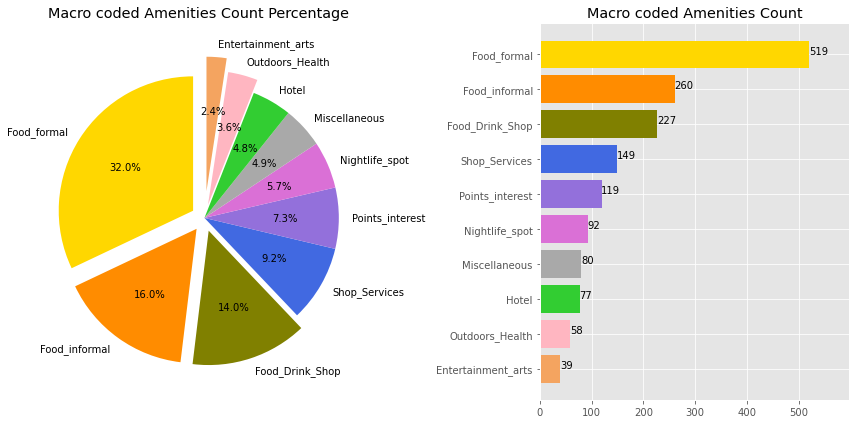

In [40]:
coded_graph = df_am.groupby('Coded_Cat')['Am_Category'].count().to_frame().sort_values(['Am_Category'],ascending=False)

mycolors = ['gold', 'darkorange', 'olive', 'royalblue', 'mediumpurple', 'orchid', 'darkgrey', 'limegreen', 'lightpink',
            'sandybrown']
explode = (0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0.1, 0.2)  

fig1, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.pie(coded_graph['Am_Category'], explode=explode, labels=coded_graph.index, autopct='%1.1f%%',
        startangle=90,colors = mycolors)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

ax2.barh(coded_graph.index,coded_graph['Am_Category'],color=mycolors)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax2.text(i.get_width()-.3, i.get_y()+.38, \
            str(i.get_width()), fontsize=10, color='black')

# invert for largest on top 
ax2.invert_yaxis()

ax1.set(title = "Macro coded Amenities Count Percentage")
ax2.set(title = "Macro coded Amenities Count")
ax2.set_xmargin(0.15)

plt.tight_layout()
plt.show()

First raw insights:
1. We have many Food related amenities
2. We are poor in Entertainment and Arts ameties

Ok, with this, more manageable categorization, let's map it with diferent colors

In [41]:
#helper function to do the coloring
def coloring(cat):
    if( cat == 'Food_formal'):
        return 'gold'
    if( cat == 'Food_informal'):
        return 'darkorange'
    if( cat == 'Food_Drink_Shop'):
        return 'olive'
    if( cat == 'Shop_Services'):
        return 'royalblue'
    if( cat == 'Points_interest'):
        return 'mediumpurple'
    if( cat == 'Nightlife_spot'):
        return 'orchid'
    if( cat == 'Miscellaneous'):
        return 'darkgrey'
    if( cat == 'Hotel'):
        return 'limegreen'
    if( cat == 'Outdoors_Health'):
        return 'lightpink'
    if( cat == 'Entertainment_arts'):
        return 'sandybrown'    
    else:
        return 'black'

In [42]:
map_am_cod = folium.Map(location=am_center, zoom_start=10)

# add markers to map
for lat, lng, ort, orts in zip(df_am['Am_Lat'], df_am['Am_Lon'], df_am['Amenity'],df_am['Coded_Cat']):
    label = '{}, {}'.format(ort, orts)
    label = folium.Popup(label, parse_html=True)
    color1 = coloring(orts)
    folium.CircleMarker([lat, lng],
                  radius=3,
                  popup=label,
                  color=color1,
                  fill=True,
                  fill_color=color1,
                  fill_opacity=1,
                  parse_html=False).add_to(map_am_cod)

map_am_cod

As expected the biggest amenities concentrations are in the city of Frankfurt.

Let's try to map this in a more user friendly way, where we can choose wich amenities we want to see. 

In [43]:
from folium import plugins

map_cod = folium.Map(location=am_center, zoom_start=10, tiles='cartodbdark_matter')


mcg = folium.plugins.MarkerCluster(control=False)
map_cod.add_child(mcg)

g1 = folium.plugins.FeatureGroupSubGroup(mcg, "Food Formal")
map_cod.add_child(g1)

g2 = folium.plugins.FeatureGroupSubGroup(mcg, "Food Informal")
map_cod.add_child(g2)

g3 = folium.plugins.FeatureGroupSubGroup(mcg, "Food and Drink Shop")
map_cod.add_child(g3)

g4 = folium.plugins.FeatureGroupSubGroup(mcg, "Shop and Services")
map_cod.add_child(g4)

g5 = folium.plugins.FeatureGroupSubGroup(mcg, "Points of interest")
map_cod.add_child(g5)

g6 = folium.plugins.FeatureGroupSubGroup(mcg, "Nightlife spots")
map_cod.add_child(g6)

g7 = folium.plugins.FeatureGroupSubGroup(mcg, "Miscellaneous")
map_cod.add_child(g7)

g8 = folium.plugins.FeatureGroupSubGroup(mcg, "Hotel")
map_cod.add_child(g8)

g9 = folium.plugins.FeatureGroupSubGroup(mcg, "Outdoors and Health")
map_cod.add_child(g9)

g10 = folium.plugins.FeatureGroupSubGroup(mcg, "Entertainment and Arts")
map_cod.add_child(g10)

for lat, lng, ort, orts in zip(df_am['Am_Lat'], df_am['Am_Lon'], df_am['Amenity'],df_am['Coded_Cat']):
    label = '{}, {}'.format(ort, orts)
    label = folium.Popup(label, parse_html=True)
    color1 = coloring(orts)
    if(orts == 'Food_formal'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g1)
    if(orts == 'Food_informal'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g2)
    if(orts == 'Food_Drink_Shop'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g3)
    if(orts == 'Shop_Services'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g4)
    if(orts == 'Points_interest'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g5)
    if(orts == 'Nightlife_spot'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g6)
    if(orts == 'Miscellaneous'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g7)
    if(orts == 'Hotel'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g8)
    if(orts == 'Outdoors_Health'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g9)
    if(orts == 'Entertainment_arts'):
        folium.CircleMarker([lat, lng],radius=3,popup=label,color=color1,fill=True,fill_color=color1,fill_opacity=1,parse_html=False).add_to(g10)
        
    
        
folium.LayerControl(collapsed=False).add_to(map_cod)

map_cod

To end this exploration let's do a Heatmap and find the areas where we have amenities concentrations

In [44]:
#funciona
from folium.plugins import HeatMap

map_heat = map_target

HeatMap(data = df_am[['Am_Lat','Am_Lon']].values.tolist()).add_to(map_heat)
HeatMap(data = df_am[['Am_Lat','Am_Lon']].values.tolist(),radius=8, max_zoom=13).add_to(map_heat)

map_heat

**Onehot Encoding and Exploration** <a name="here"></a>

to the top [Introduction: Business Problem](#introduction) 

## Delete THIS

In [ ]:
# aqui tens de usar a amenities dataframe porque limpaste a am_df de duplicados

In [129]:
am_enc=amenities.copy()
#am_enc.head()

In [130]:
am_enc['PLZ_Ort'] = am_enc[['PLZ', 'Ort']].agg(' - '.join, axis=1)
am_enc.drop(['PLZ','Ort'], axis=1, inplace=True)

am_enc = am_enc.rename(columns={'PLZ_Ort': 'Area','Ort_Lat':'Area_Lat','Ort_Lon':'Area_Lon'})

fixed_columns = [am_enc.columns[-1]] + list(am_enc.columns[:-1])
am_enc = am_enc[fixed_columns]

am_enc.head()
#print('There are {} uniques categories.'.format(len(df_am['Am_Category'].unique())))

Area   Area_Lat  Area_Lon              Amenity     Am_Lat  \
0  65520 - Bad Camberg  50.299603  8.267312                 REWE  50.301920   
1  65520 - Bad Camberg  50.299603  8.267312           India Haus  50.298974   
2  65520 - Bad Camberg  50.299603  8.267312  Kurpark Bad Camberg  50.297865   
3  65520 - Bad Camberg  50.299603  8.267312        Banyan Garden  50.295113   
4  65520 - Bad Camberg  50.299603  8.267312         Cafe Schäfer  50.302721   

     Am_Lon         Am_Category  
0  8.260702         Supermarket  
1  8.264521   Indian Restaurant  
2  8.272318                Park  
3  8.269464  Chinese Restaurant  
4  8.260552              Bakery

In [131]:
#Kmeans preparation - one hot

# one hot encoding
am_onehot = pd.get_dummies(am_enc[['Am_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
am_onehot['Area'] = am_enc['Area'] 

# move neighborhood column to the first column
fixed_columns = [am_onehot.columns[-1]] + list(am_onehot.columns[:-1])
am_onehot = am_onehot[fixed_columns]

am_onehot.head()

Area  Accessories Store  African Restaurant  \
0  65520 - Bad Camberg                  0                   0   
1  65520 - Bad Camberg                  0                   0   
2  65520 - Bad Camberg                  0                   0   
3  65520 - Bad Camberg                  0                   0   
4  65520 - Bad Camberg                  0                   0   

   American Restaurant  Amphitheater  Apple Wine Pub  Argentinian Restaurant  \
0                    0             0               0                       0   
1                    0             0               0                       0   
2                    0             0               0                       0   
3                    0             0               0                       0   
4                    0             0               0                       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                   0                      0                    0   
1                   0                      0                    0   
2                   0                      0                    0   
3                   0                      0                    0   
4                   0                      0                    0   

   Auto Dealership  Auto Garage  Automotive Shop  Bakery  Bank  Bar  \
0                0            0                0       0     0    0   
1                0            0                0       0     0    0   
2                0            0                0       0     0    0   
3                0            0                0       0     0    0   
4                0            0                0       1     0    0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0                0         0            0           0                   0   
1                0         0            0           0                   0   
2                0         0            0           0                   0   
3                0         0            0           0                   0   
4                0         0            0           0                   0   

   Big Box Store  Bistro  Board Shop  Boarding House  Boat or Ferry  \
0              0       0           0               0              0   
1              0       0           0               0              0   
2              0       0           0               0              0   
3              0       0           0               0              0   
4              0       0           0               0              0   

   Bookstore  Botanical Garden  Boutique  Breakfast Spot  Brewery  \
0          0                 0         0               0        0   
1          0                 0         0               0        0   
2          0                 0         0               0        0   
3          0                 0         0               0        0   
4          0                 0         0               0        0   

   Buddhist Temple  Building  Burger Joint  Bus Station  Bus Stop  \
0                0         0             0            0         0   
1                0         0             0            0         0   
2                0         0             0            0         0   
3                0         0             0            0         0   
4                0         0             0            0         0   

   Business Service  Butcher  Cafeteria  Café  Castle  Cheese Shop  \
0                 0        0          0     0       0            0   
1                 0        0 

In [120]:
print("Amenities Onehot encoding shape: ",am_onehot.shape)

am_grouped = am_onehot.groupby('Area').mean().reset_index()

print()
print("Amenities Onehot encoding grouped shape: ", am_grouped.shape)
print()
am_grouped.head()

Amenities Onehot encoding shape:  (1673, 235)

Amenities Onehot encoding grouped shape:  (90, 235)



Area  Accessories Store  African Restaurant  \
0           35510 - Butzbach               0.00                0.00   
1  60311 - Frankfurt am Main               0.00                0.00   
2  60313 - Frankfurt am Main               0.01                0.01   
3  60314 - Frankfurt am Main               0.00                0.00   
4  60316 - Frankfurt am Main               0.00                0.00   

   American Restaurant  Amphitheater  Apple Wine Pub  Argentinian Restaurant  \
0             0.000000           0.0             0.0                     0.0   
1             0.012658           0.0             0.0                     0.0   
2             0.010000           0.0             0.0                     0.0   
3             0.000000           0.0             0.0                     0.0   
4             0.000000           0.0             0.0                     0.0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0          0.0    0.000000                  0.0          0.000000   
1          0.0    0.025316                  0.0          0.000000   
2          0.0    0.000000                  0.0          0.010000   
3          0.0    0.000000                  0.0          0.024390   
4          0.0    0.000000                  0.0          0.017857   

   Athletics & Sports  Australian Restaurant  Austrian Restaurant  \
0                 0.0                    0.0             0.000000   
1                 0.0                    0.0             0.012658   
2                 0.0                    0.0             0.000000   
3                 0.0                    0.0             0.000000   
4                 0.0                    0.0             0.000000   

   Auto Dealership  Auto Garage  Automotive Shop    Bakery  Bank       Bar  \
0          0.00000          0.0              0.0  0.000000   0.0  0.000000   
1          0.00000          0.0              0.0  0.012658   0.0  0.012658   
2          0.00000          0.0              0.0  0.020000   0.0  0.050000   
3          0.02439          0.0              0.0  0.048780   0.0  0.000000   
4          0.00000          0.0              0.0  0.053571   0.0  0.053571   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0              0.0  0.000000          0.0         0.0                 0.0   
1              0.0  0.012658          0.0         0.0                 0.0   
2              0.0  0.000000          0.0         0.0                 0.0   
3              0.0  0.000000          0.0         0.0                 0.0   
4              0.0  0.000000          0.0         0.0                 0.0   

   Big Box Store    Bistro  Board Shop  Boarding House  Boat or Ferry  \
0            0.0  0.000000    0.000000             0.0            0.0   
1            0.0  0.012658    0.012658             0.0            0.0   
2            0.0  0.000000    0.010000             0.0            0.0   
3            0.0  0.000000    0.000000             0.0            0.0   
4            0.0  0.000000    0.000000             0.0            0.0   

   Bookstore  Botanical Garden  Boutique  Breakfast Spot  Brewery  \
0       0.00               0.0  0.000000        0.000000     0.00   
1       0.00               0.0  0.025316        0.000000     0.00   
2       0.01               0.0  0.020000        0.000000     0.01   
3       0.00               0.0  0.000000        0.000000     0.00   
4       0.00               0.0  0.000000        0.017857     0.00   

   Buddhist Temple  Building  Burger Joint  Bus Station  Bus Stop  \
0              0.0       0.0      0.000000          0.0       0.0   
1              0.0       0.0      0.012658          0.0       0.0   
2              0.0       0.0      0.020000          0.0       0.0   
3              0.0       0.0      0.024390          0.0       0.0   
4              0.0       0.0      0.053571          0.0       0.0   

   Business Service   Butcher  Cafeteria      Café  Castle  Cheese Shop  \
0         

In [132]:
#Helper function to sort in descending order

def return_most_common_amenities(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [133]:
#create and display the dataframe

num_top_amenity = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_amenity):
    try:
        columns.append('{}{} Most Common Amenity'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Amenity'.format(ind+1))

# create a new dataframe
area_am_sorted = pd.DataFrame(columns=columns)
area_am_sorted['Area'] = am_grouped['Area']

for ind in np.arange(am_grouped.shape[0]):
    area_am_sorted.iloc[ind, 1:] = return_most_common_amenities(am_grouped.iloc[ind, :], num_top_amenity)

area_am_sorted

Area 1st Most Common Amenity  \
0                   35510 - Butzbach             Supermarket   
1          60311 - Frankfurt am Main                    Café   
2          60313 - Frankfurt am Main                    Café   
3          60314 - Frankfurt am Main                   Hotel   
4          60316 - Frankfurt am Main                    Café   
5          60318 - Frankfurt am Main                    Café   
6          60320 - Frankfurt am Main             Pizza Place   
7          60322 - Frankfurt am Main      Italian Restaurant   
8          60323 - Frankfurt am Main      Italian Restaurant   
9          60325 - Frankfurt am Main      Italian Restaurant   
10         60326 - Frankfurt am Main             Supermarket   
11         60327 - Frankfurt am Main                    Café   
12         60329 - Frankfurt am Main                   Hotel   
13         60385 - Frankfurt am Main                    Café   
14         60386 - Frankfurt am Main  Furniture / Home Store   
15         60388 - Frankfurt am Main       German Restaurant   
16         60389 - Frankfurt am Main           Metro Station   
17         60431 - Frankfurt am Main             Supermarket   
18         60433 - Frankfurt am Main                 Stables   
19         60435 - Frankfurt am Main             Sports Club   
20         60438 - Frankfurt am Main             Supermarket   
21         60439 - Frankfurt am Main          Clothing Store   
22         60486 - Frankfurt am Main      Italian Restaurant   
23         60487 - Frankfurt am Main                    Café   
24         60488 - Frankfurt am Main              Playground   
25         60489 - Frankfurt am Main             Supermarket   
26         60528 - Frankfurt am Main             Supermarket   
27         60529 - Frankfurt am Main     Arts & Crafts Store   
28         60594 - Frankfurt am Main          Apple Wine Pub   
29         60596 - Frankfurt am Main                    Park   
30         60598 - Frankfurt am Main                   Hotel   
31         60599 - Frankfurt am Main            Tram Station   
32                61118 - Bad Vilbel             Supermarket   
33                  61130 - Nidderau           Train Station   
34                  61137 - Schöneck             Supermarket   
35           61138 - Niederdorfelden             Supermarket   
36        61169 - Friedberg (Hessen)             Supermarket   
37                    61184 - Karben            Soccer Field   
38        61191 - Rosbach v. d. Höhe    Fast Food Restaurant   
39                  61194 - Niddatal       Electronics Store   
40                 61197 - Florstadt             Supermarket   
41              61203 - Reichelsheim         Organic Grocery   
42                 61206 - Wöllstadt                 Dog Run   
43               61231 - Bad Nauheim                   Hotel   
44               61239 - Ober-Mörlen             Supermarket   
45                   61250 - Usingen             Supermarket   
46               61267 - Neu-Anspach             Supermarket   
47                  61273 - Wehrheim             Supermarket   
48                   61276 - Weilrod          Scenic Lookout   
49            61279 - Grävenwiesbach                     Bar   
50  61348 - Bad Homburg vor der Höhe      Italian Restaurant   
51  61350 - Bad Homburg vor der Höhe                   Hotel   
52  61352 - Bad Homburg vor der Höhe             Supermarket   
53            61381 - Friedrichsdorf                   Hotel   
54                 61389 - Schmitten                   Hotel   
55                 61440 - Oberursel      Italian Restaurant   
56                 61449 - Steinbach       German Restaurant   
57                61462 - Königstein      Italian Restaurant   
58                  61476 - Kronberg       German Restaurant   
59                61479 - Glashütten                   Hotel   
60         63065 - Offenbach am Main        Sushi Restaurant   
61         63067 - Offenbach am Main      Italian Restaurant   


**9. Cluster Neighborhoods: K Means Analysis**

In [134]:
#evaluate best number of clusters
from sklearn.cluster import KMeans

am_grouped_clustering = am_grouped.drop('Area', 1)

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(am_grouped_clustering)
    sum_of_squared_distances.append(k_means.inertia_)

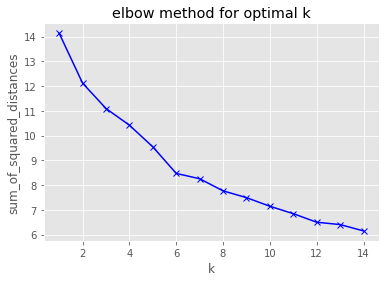

In [135]:
#em principio podes apagar os imports abaixo
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

From the graph above we are going to choose # as the optimal number of clusters for our analysis

In [136]:
#create kmeans

#Run k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 6

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(am_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Since we did the analysis on the elbow plot let's evaluate some metrics

In [137]:
from sklearn import metrics
labels = kmeans.labels_
print("Silhouette Coefficient: ", metrics.silhouette_score(am_grouped_clustering, labels, metric = 'euclidean'))
print("Calinski Harabasz Score: ", metrics.calinski_harabasz_score(am_grouped_clustering, labels))

Silhouette Coefficient:  0.15018306568416703
Calinski Harabasz Score:  10.977636508451939


**Plotting clusters - problema para fazer o join com o ort não vais conseguir por exitirem duplicaçoes de ort**

In [139]:
am_data = am_df.copy()

In [140]:
am_data['PLZ_Ort'] = am_data[['PLZ', 'Ort']].agg(' - '.join, axis=1)
am_data.drop(['PLZ','Ort','Landkreis','einwohner'], axis=1, inplace=True)

am_data = am_data.rename(columns={'PLZ_Ort': 'Area'})

fixed_columns = [am_data.columns[-1]] + list(am_data.columns[:-1])
am_data = am_data[fixed_columns]

am_data.head()

Area                 Ortsteile   latitude  \
0               65520 - Bad Camberg               Bad Camberg  50.299603   
1  61348 - Bad Homburg vor der Höhe  Bad Homburg vor der Höhe  50.226423   
2  61352 - Bad Homburg vor der Höhe  Bad Homburg vor der Höhe  50.221324   
3  61350 - Bad Homburg vor der Höhe  Bad Homburg vor der Höhe  50.239388   
4               61231 - Bad Nauheim               Bad Nauheim  50.368111   

   longitude  
0   8.267312  
1   8.611368  
2   8.653160  
3   8.600062  
4   8.747361

In [141]:
# add clustering labels
area_am_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

am_merged = am_data

#the join has to be right because one of the areas wasn't classified, for not having any foursquare data (maybe rethink coordinates?)
am_merged = am_merged.join(area_am_sorted.set_index('Area'), on='Area', how='right')

am_merged.head()

Area                           Ortsteile   latitude  \
7            35510 - Butzbach                            Butzbach  50.434042   
16  60311 - Frankfurt am Main                Altstadt, Innenstadt  50.111320   
14  60313 - Frankfurt am Main                Altstadt, Innenstadt  50.115291   
20  60314 - Frankfurt am Main                  Fechenheim, Ostend  50.113812   
38  60316 - Frankfurt am Main  Nordend-West, Nordend-Ost, Ostend   50.120735   

    longitude  Cluster Labels 1st Most Common Amenity 2nd Most Common Amenity  \
7    8.671118               0             Supermarket               Drugstore   
16   8.683249               3                    Café       German Restaurant   
14   8.682501               3                    Café      Italian Restaurant   
20   8.712702               3                   Hotel    Gym / Fitness Center   
38   8.696523               3                    Café      Italian Restaurant   

       3rd Most Common Amenity 4th Most Common Amenity  \
7   Construction & Landscaping              Shoe Store   
16                       Plaza             Coffee Shop   
14                  Restaurant                     Bar   
20                      Bakery             Escape Room   
38                Burger Joint                  Bakery   

   5th Most Common Amenity 6th Most Common Amenity 7th Most Common Amenity  \
7           Sandwich Place                    Café      Turkish Restaurant   
16              Restaurant    Gym / Fitness Center          Scenic Lookout   
14         Thai Restaurant             Coffee Shop     Japanese Restaurant   
20             Supermarket      Italian Restaurant               Laser Tag   
38         Thai Restaurant                     Bar                   Plaza   

       8th Most Common Amenity 9th Most Common Amenity  \
7             Greek Restaurant      Italian Restaurant   
16                    Boutique      Italian Restaurant   
14                       Plaza          Sandwich Place   
20           French Restaurant     Hawaiian Restaurant   
38  Modern European Restaurant             Supermarket   

   10th Most Common Amenity  
7       Indie Movie Theater  
16                    Hotel  
14         Doner Restaurant  
20     Outdoor Supply Store  
38      Japanese Restaurant

In [143]:
import matplotlib.cm as cm
import matplotlib.colors as colors

center2 = get_center_latlong(am_merged,'latitude','longitude')

# create map
map_clusters = folium.Map(location=center2, zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(am_merged['latitude'], am_merged['longitude'], am_merged['Area'], am_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

[To Table of Contents](#top)

## 5. Results and Discussion <a name="results"></a>

In [ ]:
#analyse clusters

In [151]:
am_merged.loc[am_merged['Cluster Labels'] == 0, am_merged.columns[[0,1] + list(range(5, am_merged.shape[1]))]]

Area  \
7                   35510 - Butzbach   
41         60431 - Frankfurt am Main   
44         60433 - Frankfurt am Main   
33         60488 - Frankfurt am Main   
27         60489 - Frankfurt am Main   
42         60528 - Frankfurt am Main   
30         60598 - Frankfurt am Main   
87                  61137 - Schöneck   
74           61138 - Niederdorfelden   
61                    61184 - Karben   
10                 61197 - Florstadt   
76               61239 - Ober-Mörlen   
91                   61250 - Usingen   
70               61267 - Neu-Anspach   
2   61352 - Bad Homburg vor der Höhe   
86                 61389 - Schmitten   
89                 61449 - Steinbach   
82         63071 - Offenbach am Main   
68                   63477 - Maintal   
0                65520 - Bad Camberg   
75             65527 - Niedernhausen   
88      65824 - Schwalbach am Taunus   
65                   65830 - Kriftel   
67      65835 - Liederbach am Taunus   
45         65929 - Frankfurt am Main   
35         65931 - Frankfurt am Main   
28         65934 - Frankfurt am Main   
23         65936 - Frankfurt am Main   

                                            Ortsteile 1st Most Common Amenity  \
7                                            Butzbach             Supermarket   
41  Bockenheim, Dornbusch, Eschersheim, Ginnheim, ...             Supermarket   
44  Bonames, Dornbusch, Eschersheim, Frankfurter B...                 Stables   
33                       Hausen, Praunheim, Rödelheim              Playground   
27                                          Rödelheim             Supermarket   
42  Niederrad, Sachsenhausen-Nord, Sachsenhausen-S...             Supermarket   
30              Sachsenhausen-Nord, Sachsenhausen-Süd                   Hotel   
87                                  Schöneck (Hessen)             Supermarket   
74                                    Niederdorfelden             Supermarket   
61                                             Karben            Soccer Field   
10                                          Florstadt             Supermarket   
76                                        Ober-Mörlen             Supermarket   
91                                            Usingen             Supermarket   
70                                        Neu-Anspach             Supermarket   
2                            Bad Homburg vor der Höhe             Supermarket   
86                                          Schmitten                   Hotel   
89                                 Steinbach (Taunus)       German Restaurant   
82                       Offenbach am Main, Tempelsee                   Hotel   
68                                            Maintal             Supermarket   
0                                         Bad Camberg                  Bakery   
75                                      Niedernhausen             Supermarket   
88                               Schwalbach am Taunus             Supermarket   
65                                            Kriftel             Supermarket   
67                               Liederbach am Taunus             Supermarket   
45                            Höchst, Unterliederbach             Supermarket   
35                              Sindlingen, Zeilsheim      Light Rail Station   
28                                       Höchst, Nied            Tram Station   
23                                   Nied, Sossenheim                  Bakery   

   2nd Most Common Amenity        3rd Most Common Amenity  \
7                Drugstore     Construction & Landscaping   
41                   Plaza             Italian Restaurant   
44   Portuguese Restaurant                    Supermarket   
33             Supermarket                  Metro Station   
27          Ice Cream Shop  Vegetarian / Vegan Restaurant   
42      Italian Restaurant                         Bakery   
30             Supermarket                         Garden   
87           Train Station       

In [145]:
am_merged.loc[am_merged['Cluster Labels'] == 1, am_merged.columns[[1] + list(range(5, am_merged.shape[1]))]]

Ortsteile 1st Most Common Amenity  \
39  Oberrad, Sachsenhausen-Nord, Sachsenhausen-Süd            Tram Station   

   2nd Most Common Amenity 3rd Most Common Amenity 4th Most Common Amenity  \
39       Accessories Store         Organic Grocery       Mobile Phone Shop   

       5th Most Common Amenity 6th Most Common Amenity  \
39  Modern European Restaurant     Monument / Landmark   

   7th Most Common Amenity 8th Most Common Amenity 9th Most Common Amenity  \
39     Moroccan Restaurant         Motorcycle Shop           Movie Theater   

   10th Most Common Amenity  
39                Multiplex

In [152]:
am_merged.loc[am_merged['Cluster Labels'] == 2, am_merged.columns[[0,1] + list(range(5, am_merged.shape[1]))]]

Area            Ortsteile 1st Most Common Amenity  \
94              61276 - Weilrod              Weilrod          Scenic Lookout   
60  65510 - Idstein, Hünstetten  Idstein, Hünstetten          Scenic Lookout   

   2nd Most Common Amenity 3rd Most Common Amenity  \
94       Accessories Store         Organic Grocery   
60       Accessories Store         Organic Grocery   

       4th Most Common Amenity 5th Most Common Amenity  \
94  Modern European Restaurant     Monument / Landmark   
60  Modern European Restaurant     Monument / Landmark   

   6th Most Common Amenity 7th Most Common Amenity 8th Most Common Amenity  \
94     Moroccan Restaurant         Motorcycle Shop           Movie Theater   
60     Moroccan Restaurant         Motorcycle Shop           Movie Theater   

   9th Most Common Amenity 10th Most Common Amenity  
94               Multiplex                   Museum  
60               Multiplex                   Museum

In [153]:
am_merged.loc[am_merged['Cluster Labels'] == 3, am_merged.columns[[0,1] + list(range(5, am_merged.shape[1]))]]

Area  \
16         60311 - Frankfurt am Main   
14         60313 - Frankfurt am Main   
20         60314 - Frankfurt am Main   
38         60316 - Frankfurt am Main   
29         60318 - Frankfurt am Main   
25         60320 - Frankfurt am Main   
22         60322 - Frankfurt am Main   
18         60323 - Frankfurt am Main   
17         60325 - Frankfurt am Main   
36         60326 - Frankfurt am Main   
19         60327 - Frankfurt am Main   
13         60329 - Frankfurt am Main   
48         60385 - Frankfurt am Main   
37         60386 - Frankfurt am Main   
31         60388 - Frankfurt am Main   
43         60389 - Frankfurt am Main   
46         60435 - Frankfurt am Main   
15         60438 - Frankfurt am Main   
49         60439 - Frankfurt am Main   
32         60486 - Frankfurt am Main   
24         60487 - Frankfurt am Main   
34         60529 - Frankfurt am Main   
26         60594 - Frankfurt am Main   
21         60596 - Frankfurt am Main   
6                 61118 - Bad Vilbel   
53        61169 - Friedberg (Hessen)   
85        61191 - Rosbach v. d. Höhe   
95                 61206 - Wöllstadt   
4                61231 - Bad Nauheim   
56            61279 - Grävenwiesbach   
1   61348 - Bad Homburg vor der Höhe   
3   61350 - Bad Homburg vor der Höhe   
54            61381 - Friedrichsdorf   
77                 61440 - Oberursel   
64                61462 - Königstein   
66                  61476 - Kronberg   
55                61479 - Glashütten   
80         63065 - Offenbach am Main   
81         63067 - Offenbach am Main   
83         63069 - Offenbach am Main   
78         63073 - Offenbach am Main   
79         63075 - Offenbach am Main   
69          63165 - Mühlheim am Main   
71              63263 - Neu-Isenburg   
57                     63454 - Hanau   
63               65451 - Kelsterbach   
92                   65529 - Waldems   
59         65719 - Hofheim am Taunus   
9                   65760 - Eschborn   
62                  65779 - Kelkheim   
58               65795 - Hattersheim   
5       65812 - Bad Soden am Taunus    
8                   65817 - Eppstein   
90         65843 - Sulzbach (Taunus)   
40         65933 - Frankfurt am Main   

                                            Ortsteile 1st Most Common Amenity  \
16                               Altstadt, Innenstadt                    Café   
14                               Altstadt, Innenstadt                    Café   
20                                 Fechenheim, Ostend                   Hotel   
38                 Nordend-West, Nordend-Ost, Ostend                     Café   
29              Innenstadt, Nordend-Ost, Nordend-West                    Café   
25  Dornbusch, Eckenheim, Nordend-West, Westend-No...             Pizza Place   
22  Dornbusch, Innenstadt, Nordend-West, Westend-N...      Italian Restaurant   
18                          Westend-Nord, Westend-Süd      Italian Restaurant   
17                    Bockenheim, Gallus, Westend-Süd      Italian Restaurant   
36                                  Gallus, Griesheim             Supermarket   
19                Gallus, Gutleutviertel, Westend-Süd                    Café   
13  Bahnhofsviertel, Gallus, Gutleutviertel, Innen...                   Hotel   
48                      Bornheim, Nordend-Ost, Ostend                    Café   
37         Bornheim, Fechenheim, Riederwald, Seckbach  Furniture / Home Store   
31                           Bergen-Enkheim, Seckbach       German Restaurant   
43  Bergen-Enkheim, Bornheim, Nordend-Ost, Nordend...           Metro Station   
46  Berkersheim, Bornheim, Dornbusch, Eckenheim, N...             Sports Club   
15                                   Kalbach-Riedberg             Supermarket   
49  Heddernheim, Kalbach-Riedberg, Niederursel, Pr...          Clothing Store   
32         Bockenheim, Gallus, Rödelheim, Westend-Süd      Italian Restaurant   
24         Bockenheim, Hausen, Rödelheim, Westend-Süd                    Café   
34       

In [154]:
am_merged.loc[am_merged['Cluster Labels'] == 4, am_merged.columns[[0,1] + list(range(5, am_merged.shape[1]))]]

Area Ortsteile 1st Most Common Amenity  \
72  61194 - Niddatal  Niddatal       Electronics Store   

   2nd Most Common Amenity     3rd Most Common Amenity  \
72    Outdoor Supply Store  Modern European Restaurant   

   4th Most Common Amenity 5th Most Common Amenity 6th Most Common Amenity  \
72     Monument / Landmark     Moroccan Restaurant         Motorcycle Shop   

   7th Most Common Amenity 8th Most Common Amenity 9th Most Common Amenity  \
72           Movie Theater               Multiplex                  Museum   

   10th Most Common Amenity  
72              Music Venue

In [155]:
am_merged.loc[am_merged['Cluster Labels'] == 5, am_merged.columns[[0,1] + list(range(5, am_merged.shape[1]))]]

Area                Ortsteile 1st Most Common Amenity  \
73      61130 - Nidderau                 Nidderau           Train Station   
84  61203 - Reichelsheim  Reichelsheim (Wetterau)         Organic Grocery   
93      61273 - Wehrheim                 Wehrheim             Supermarket   

   2nd Most Common Amenity 3rd Most Common Amenity 4th Most Common Amenity  \
73                   Plaza             Supermarket           Shopping Mall   
84           Train Station       Accessories Store       Mobile Phone Shop   
93       German Restaurant                    Café           Train Station   

       5th Most Common Amenity 6th Most Common Amenity  \
73               Movie Theater       German Restaurant   
84  Modern European Restaurant     Monument / Landmark   
93           Accessories Store            Optical Shop   

       7th Most Common Amenity     8th Most Common Amenity  \
73                Optical Shop  Modern European Restaurant   
84         Moroccan Restaurant             Motorcycle Shop   
93  Modern European Restaurant         Monument / Landmark   

   9th Most Common Amenity 10th Most Common Amenity  
73     Monument / Landmark      Moroccan Restaurant  
84           Movie Theater                Multiplex  
93     Moroccan Restaurant          Motorcycle Shop

[To Table of Contents](#top)

## 6. Conclusion <a name="conclusion"></a>

In [ ]:
#conclusions

[To Table of Contents](#top)